In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns  # Imorting Seaborn library


from google.colab import files
uploaded = files.upload()
import io
Brain_Age_Prediction_Data = pd.read_excel(io.BytesIO(uploaded['Volumetric_features (Regression).xlsx']))
# Dataset is now stored in a Pandas Dataframe

Saving Volumetric_features (Regression).xlsx to Volumetric_features (Regression).xlsx


In [ ]:
Brain_Age_Prediction_Data.head() #Checking that it uplaoded as a Pandas Data Frame

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [ ]:
Brain_Age_Prediction_Data.drop(['S.No','dataset'], axis=1, inplace=True)

In [ ]:
Brain_Age_Prediction_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Columns: 139 entries, Left-Lateral-Ventricle to Age
dtypes: float64(122), int64(17)
memory usage: 4.5 MB


In [ ]:
Brain_Age_Prediction_Data.describe()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000
mean,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,1797.243469,...,2.655624,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586
std,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,583.220321,...,0.207942,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099
min,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,371.900000,...,1.563000,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000
25%,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,1408.050000,...,2.521000,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000
50%,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,1683.850000,...,2.665000,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000
75%,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,2044.525000,...,2.808000,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000
max,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,5312.400000,...,3.240000,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000


In [ ]:
Brain_Age_Prediction_Data.corr()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age
Left-Lateral-Ventricle,1.000000,0.758895,-0.185344,-0.115200,-0.339383,0.033166,-0.297033,-0.042405,0.758326,0.434421,...,-0.480195,-0.450547,-0.258031,-0.236771,-0.346898,-0.399022,-0.473704,-0.143671,0.311918,0.569539
Left-Inf-Lat-Vent,0.758895,1.000000,-0.185624,-0.114728,-0.324770,-0.000890,-0.270332,-0.100457,0.639533,0.446028,...,-0.472408,-0.432036,-0.280111,-0.298658,-0.313795,-0.388870,-0.460625,-0.178073,0.171763,0.496304
Left-Cerebellum-White-Matter,-0.185344,-0.185624,1.000000,0.453275,0.552485,0.232840,0.363488,0.470753,-0.195800,-0.047227,...,0.288951,0.228181,0.059456,0.129812,0.083770,0.196011,0.228483,0.573532,0.389334,-0.334077
Left-Cerebellum-Cortex,-0.115200,-0.114728,0.453275,1.000000,0.614980,0.406568,0.481604,0.453184,-0.131148,0.182886,...,0.405332,0.367147,0.095156,0.156303,0.262683,0.318206,0.383172,0.738842,0.584460,-0.471327
Left-Thalamus,-0.339383,-0.324770,0.552485,0.614980,1.000000,0.412515,0.626563,0.551486,-0.406120,0.008798,...,0.548083,0.508498,0.210113,0.234417,0.275907,0.417549,0.520636,0.779632,0.478718,-0.696598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rh_insula_thickness,-0.399022,-0.388870,0.196011,0.318206,0.417549,0.219591,0.354311,0.188610,-0.389902,-0.127933,...,0.691674,0.660150,0.425881,0.440633,0.529736,1.000000,0.728960,0.323182,0.078768,-0.547973
rh_MeanThickness_thickness,-0.473704,-0.460625,0.228483,0.383172,0.520636,0.329966,0.496941,0.241270,-0.507112,-0.144913,...,0.838040,0.907426,0.534222,0.446643,0.671823,0.728960,1.000000,0.397472,0.056084,-0.706354
BrainSegVolNotVent.2,-0.143671,-0.178073,0.573532,0.738842,0.779632,0.511158,0.671049,0.646115,-0.159878,0.113183,...,0.440652,0.389036,0.095958,0.175485,0.231965,0.323182,0.397472,1.000000,0.786937,-0.530925
eTIV.1,0.311918,0.171763,0.389334,0.584460,0.478718,0.445154,0.408873,0.541690,0.267492,0.289929,...,0.110916,0.083583,-0.092126,0.011810,0.039924,0.078768,0.056084,0.786937,1.000000,-0.109157


In [ ]:
X = Brain_Age_Prediction_Data.loc[:, Brain_Age_Prediction_Data.columns != 'Age']
y = Brain_Age_Prediction_Data['Age']
#Setting Variables as X and y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)
#splitting data into test and train data. 80% will be used for training and 20% for testing.



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors = 10, weights = 'uniform', p = 1)
neigh.fit(X_train,y_train)
#Training 


KNeighborsRegressor(n_neighbors=10, p=1)

In [ ]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_KNN_train = neigh.predict(X_train)
y_pred_KNN_test = neigh.predict(X_test)

accuracy_KNN_train = r2_score(y_train, y_pred_KNN_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_KNN_train)

accuracy_KNN_test = r2_score(y_test, y_pred_KNN_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_KNN_test)

RMSE_KNN_train = sqrt(mean_squared_error(y_train, y_pred_KNN_train))
print("RMSE for Training Data: ", RMSE_KNN_train)

RMSE_KNN_test = sqrt(mean_squared_error(y_test, y_pred_KNN_test))
print("RMSE for Testing Data: ", RMSE_KNN_test)


Training Accuracy for Multiple Linear Regression Model:  0.7763069968579309
Testing Accuracy for Multiple Linear Regression Model:  0.7265188333806616
RMSE for Training Data:  9.435251789505193
RMSE for Testing Data:  10.716479433194484


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


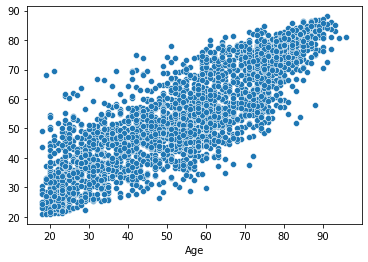

In [ ]:
sns.scatterplot(y_train, y_pred_KNN_train)

------------------------------------------

In [ ]:
#Random Forests Model

from sklearn.ensemble import RandomForestRegressor
RFregr = RandomForestRegressor()
RFregr.fit(X_train, y_train)


In [ ]:
y_pred_RF_train = RFregr.predict(X_train)
y_pred_RF_test = RFregr.predict(X_test)

accuracy_RF_train = r2_score(y_train, y_pred_RF_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_RF_train)

accuracy_RF_test = r2_score(y_test, y_pred_RF_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_RF_test)

RMSE_RF_train = sqrt(mean_squared_error(y_train, y_pred_RF_train))
print("RMSE for Training Data: ", RMSE_RF_train)

RMSE_RF_test = sqrt(mean_squared_error(y_test, y_pred_RF_test))
print("RMSE for Testing Data: ", RMSE_RF_test)

Training Accuracy for Multiple Linear Regression Model:  0.980583293197449
Testing Accuracy for Multiple Linear Regression Model:  0.8693411890140382
RMSE for Training Data:  2.779809792990718
RMSE for Testing Data:  7.407263151767134


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


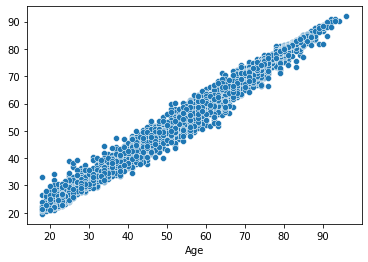

In [ ]:
sns.scatterplot(y_train, y_pred_RF_train)

------------------------------------------------------------------------------------

In [ ]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)


Training Accuracy for Multiple Linear Regression Model:  0.8612923451287987
Testing Accuracy for Multiple Linear Regression Model:  0.8489646619759633
RMSE for Training Data:  7.429806595005476
RMSE for Testing Data:  7.963935038139584


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


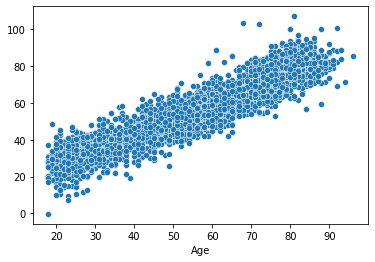

In [ ]:
sns.scatterplot(y_train, y_pred_MLR_train)

In [ ]:
multiple_linear_reg.coef_

array([-5.72200960e-03, -4.27685408e-03,  8.31288116e-04, -2.38045783e-04,
       -7.28021162e-03, -4.79924059e-03, -6.10297340e-03, -2.01987884e-03,
       -2.80261270e-03, -7.11157408e-03,  2.18745200e-03, -4.33907216e-03,
       -9.73897606e-03, -5.86956762e-03, -1.11889900e-02, -6.47182390e-03,
        1.90585794e-02, -3.28539586e-03, -5.87187360e-03, -6.27868618e-03,
        5.99541511e-04, -3.33156561e-04, -7.50523066e-03, -4.10405396e-03,
       -6.71170185e-03, -4.51621370e-03, -5.38932836e-03,  1.27092679e-03,
       -1.27717097e-02, -9.56679929e-03,  9.19559274e-03, -4.40158871e-03,
        2.11686433e-02,  1.51978769e-04, -6.44430681e-07, -7.63407941e-07,
        5.07752809e-03,  1.05722389e-07, -1.02069424e-07,  2.50401366e-02,
        7.20791280e-03, -4.41021590e-03, -4.14697404e-03,  3.69901193e-03,
       -8.34672427e-03,  4.06439798e-03, -1.60612553e-03, -2.28562968e+03,
       -2.28562983e+03,  2.28562891e+03, -5.46974751e-05,  1.15921010e-04,
        4.01645037e-05,  